In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

!gdown 1zYla1W_IgGIVdNbqU-fghkrGJ7IdVfPD

Downloading...
From: https://drive.google.com/uc?id=1zYla1W_IgGIVdNbqU-fghkrGJ7IdVfPD
To: /content/data.npy
100% 928/928 [00:00<00:00, 2.82MB/s]


In [3]:
df = np.load('data.npy')
df

array([ 40.25196507,  39.53010126,  37.7992167 ,  37.32837052,
        28.65394346,  29.69747547,  26.10881978,  27.83802602,
        22.99054421,  25.80112967,  21.29795526,  19.91155621,
        14.96131425,  11.47430672,  16.95134087,  13.78849326,
         9.82605161,   6.51423783,   7.28107882,   4.71364215,
         0.82726539,   2.0547798 ,   1.75589251,   4.69110905,
        -3.1080814 ,   6.5508178 ,   9.30439077,  -5.9567694 ,
         2.87594962,   3.1993877 ,  -2.70786354,   2.15378132,
        -1.77644948,  -5.11557224,  -4.43062279,   6.25451526,
         1.9854139 ,   7.74342429,  -0.75124188,   4.43658355,
         2.96815869,   1.56463746,   0.77572103,   6.78279848,
        -0.71535178,   2.83930294,   0.35701732, -14.02823175,
         2.74610814,  -8.92342079,  -5.25805964,  -5.91984033,
       -11.23785323, -11.91938329,  -4.2483209 ,  -0.19964379,
        -9.63227683, -13.30314598, -13.12628213,  -7.21216734,
        -6.38891745,  -0.4667489 ,  -8.21628152,  -3.07

In [4]:
y = df.copy()
x = np.linspace(-5, 12.5, num=df.size)

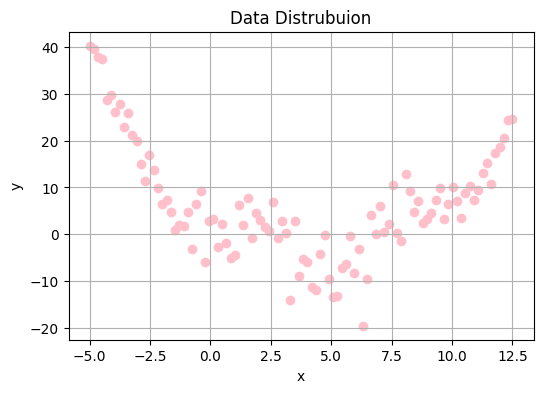

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color="pink")
plt.title("Data Distrubuion")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

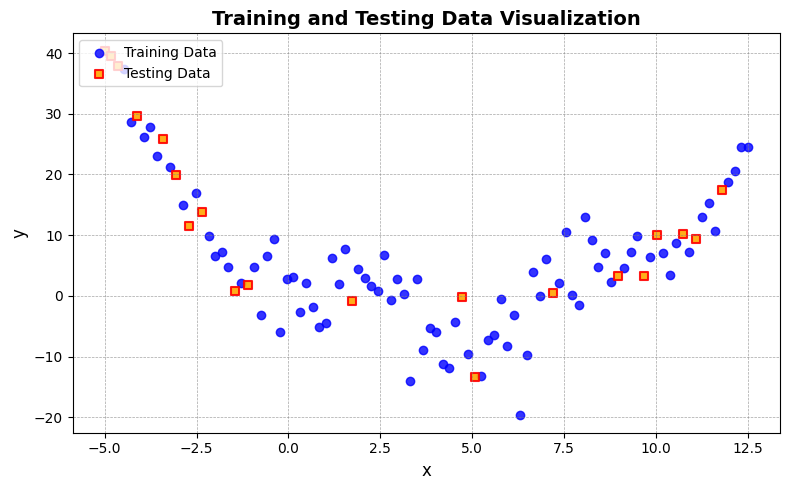

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  # افزایش اندازه شکل

# Plot training data
plt.scatter(X_train, y_train, c='blue', marker='o', label='Training Data', alpha=0.8)

# Plot testing data
plt.scatter(X_test, y_test, c='orange', marker='s', label='Testing Data', edgecolor='red', alpha=0.9, linewidth=1.5)

# Labels and legend
plt.title("Training and Testing Data Visualization", fontsize=14, fontweight='bold')
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.legend(loc='upper left', fontsize=10, frameon=True, framealpha=0.8)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
#Compute performance metrics
def compute_metrics(y_true, y_pred):
    """
    Computes MAE, MSE, and R^2.
    y_true: Actual values.
    y_pred: Predicted values.
    Returns: MAE, MSE, R^2.
    """
    mae = np.mean(np.abs(y_true - y_pred))
    mse = np.mean((y_true - y_pred)**2)
    r2 = 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)
    return mae, mse, r2

In [10]:
def calculate_weights(X, y):
    """
    Calculate the slope (m) and intercept (b) for the line y = mx + b using the least squares method.

    Parameters:
    X (array-like): Input features.
    y (array-like): Target values.

    Returns:
    tuple: Slope (m) and intercept (b) of the fitted line.
    """
    # Mean of X and y
    X_mean = np.mean(X)
    y_mean = np.mean(y)

    # Calculate slope and intercept
    m = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean) ** 2)
    b = y_mean - m * X_mean

    return m, b


def gradient_descent(X, y, n_epochs, learning_rate):
    """
    Perform gradient descent to optimize the parameters of a simple linear regression model.

    Parameters:
    X (array-like): Input features.
    y (array-like): Target values.
    n_epochs (int): Number of iterations.
    learning_rate (float): Step size for parameter updates.

    Returns:
    tuple: Final slope (m), intercept (b), and training error metrics at each epoch.
    """
    n = len(y)  # Number of training examples
    m, b = 0.0, 0.0  # Initialize parameters

    # Initialize a dictionary to store training error metrics
    training_errors = {'MAE': [], 'MSE': [], 'R2': []}

    for epoch in range(n_epochs):
        # Predictions
        y_pred = m * X + b

        # Calculate gradients
        dm = (-2 / n) * np.sum(X * (y - y_pred))
        db = (-2 / n) * np.sum(y - y_pred)

        # Update parameters
        m -= learning_rate * dm
        b -= learning_rate * db

        # Calculate and record error metrics
        mae, mse, r2 = compute_metrics(y, y_pred)
        training_errors['MAE'].append(mae)
        training_errors['MSE'].append(mse)
        training_errors['R2'].append(r2)

        # Print progress every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: MAE = {mae:.4f}, MSE = {mse:.4f}, R2 = {r2:.4f}, m = {m:.4f}, b = {b:.4f}")

    return m, b, training_errors


Epoch 0: MAE = 8.7424, MSE = 134.9077, R2 = -0.1898, m = 0.2776, b = 0.0928
Epoch 100: MAE = 7.9666, MSE = 114.0325, R2 = -0.0057, m = -0.0409, b = 3.8165
Epoch 200: MAE = 8.0424, MSE = 112.4313, R2 = 0.0085, m = -0.1664, b = 5.0026
Epoch 300: MAE = 8.0859, MSE = 112.2682, R2 = 0.0099, m = -0.2065, b = 5.3812
Epoch 400: MAE = 8.1004, MSE = 112.2516, R2 = 0.0100, m = -0.2193, b = 5.5021
Epoch 500: MAE = 8.1052, MSE = 112.2499, R2 = 0.0101, m = -0.2234, b = 5.5407


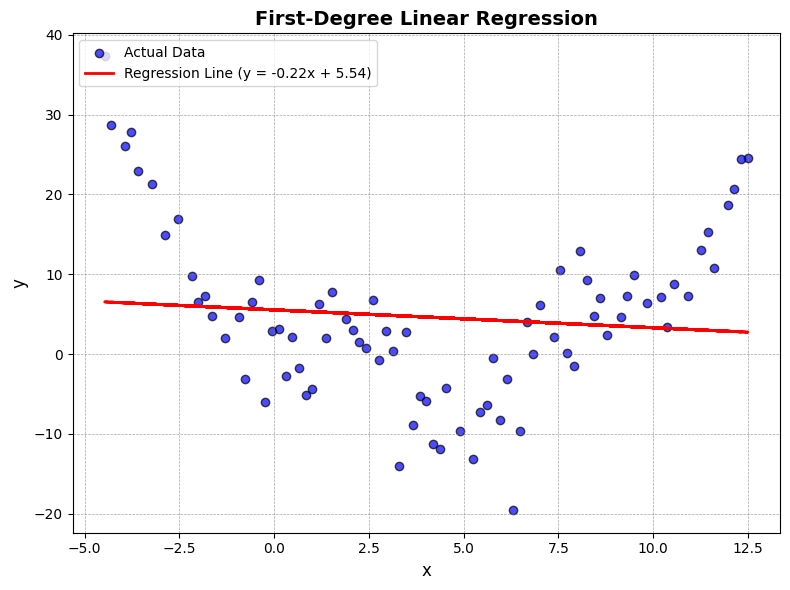

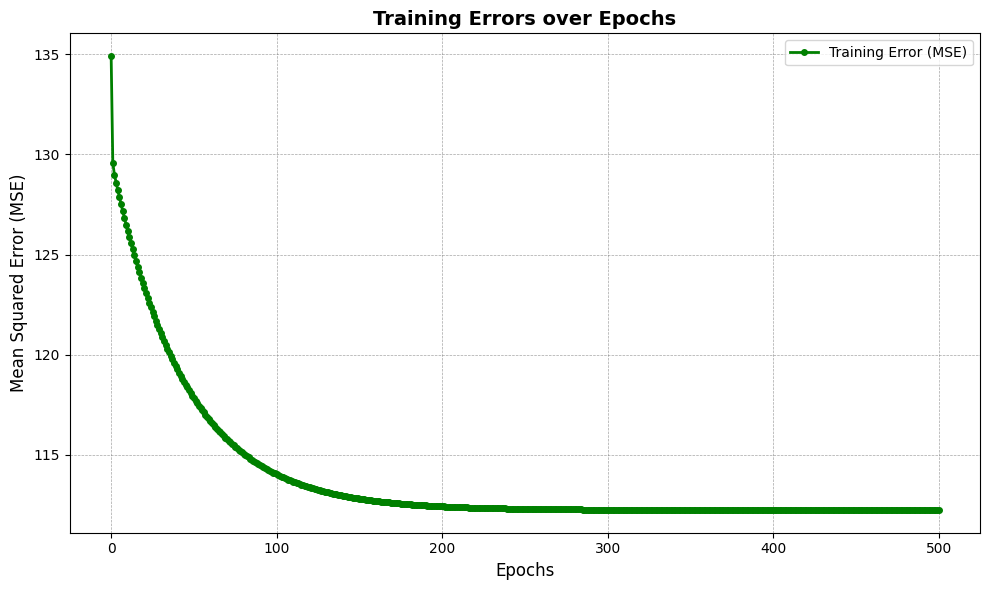

In [11]:
# Parameters
epochs = 501
learning_rate = 0.01

# Perform gradient descent
m, b, training_errors = gradient_descent(X_train, y_train, epochs, learning_rate)

# Predictions using the learned model
y_pred = m * X_train + b

# --- Visualize the data and regression line ---
plt.figure(figsize=(8, 6))

# Scatter plot for actual data
plt.scatter(X_train, y_train, label="Actual Data", color="blue", alpha=0.7, edgecolor="black")

# Line plot for regression line
plt.plot(X_train, y_pred, label=f"Regression Line (y = {m:.2f}x + {b:.2f})", color="red", linewidth=2)

# Title, labels, and legend
plt.title("First-Degree Linear Regression", fontsize=14, fontweight="bold")
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

# Adjust layout and show
plt.tight_layout()
plt.show()

# --- Plot training errors over epochs ---
plt.figure(figsize=(10, 6))

# Plot Mean Squared Error (MSE) over epochs
plt.plot(training_errors['MSE'], label="Training Error (MSE)", color="green", marker="o", markersize=4, linewidth=2)

# Title, labels, and legend
plt.title("Training Errors over Epochs", fontsize=14, fontweight="bold")
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

# Adjust layout and show
plt.tight_layout()
plt.show()


In [12]:
y_hat = m * X_test + b
MAE_test,MSE_test,R2_test = compute_metrics (y_test , y_hat)
print(f"MAE = {MAE_test} , MSE = {MSE_test} , R2 = {R2_test}")

MAE = 12.158876375920451 , MSE = 257.65924594835394 , R2 = -0.20408736081515255


In [15]:
def gradient_descent_incremental_train(X, y):
    """
    Perform incremental gradient descent to optimize the parameters of a simple linear regression model.

    Parameters:
    X (array-like): Input features.
    y (array-like): Target values.

    Returns:
    tuple: Final slope (m), intercept (b), and list of errors recorded at specific intervals.
    """
    # Number of training examples
    n = len(y)

    # Initialize weights
    m, b = 0.0, 0.0

    # Learning rate
    learning_rate = 0.01

    # List to store errors at specific epochs
    recorded_errors = []

    # Gradient descent loop
    for epoch in range(1, 501):
        # Predictions
        y_pred = m * X + b

        # Calculate gradients
        gradient_m = (-2 / n) * np.sum(X * (y - y_pred))
        gradient_b = (-2 / n) * np.sum(y - y_pred)

        # Update weights
        m -= learning_rate * gradient_m
        b -= learning_rate * gradient_b

        # Record errors at the last epoch
        if epoch % 500 == 0:
            mse_error = np.mean((y - (m * X + b)) ** 2)  # Mean Squared Error (MSE)
            recorded_errors.append(mse_error)

    return m, b, recorded_errors


In [17]:
error_inc_train = []
error_inc_test = {'MAE':[],'MSE':[],'R2':[]}
for i in range(1, len(X_train) + 1):
    # Use the first i data points for training
    X_partial_train = X_train[:i]
    y_partial_train = y_train[:i]

    # Train the model (calculate weights)
    m_partial, b_partial, e= gradient_descent_incremental_train(X_partial_train, y_partial_train)
    error_inc_train.append(e)

    #Calculate testing error
    mae,mse,r2 = compute_metrics(y_test,m_partial * X_test + b_partial)
    error_inc_test['MAE'].append(mae)
    error_inc_test['MSE'].append(mse)
    error_inc_test['R2'].append(r2)

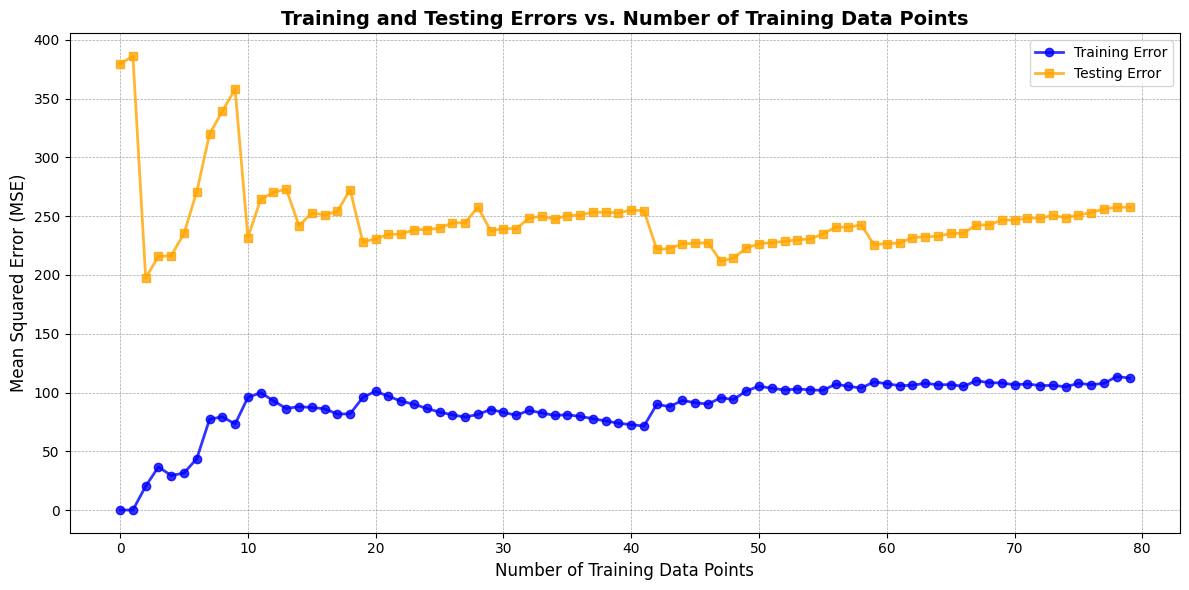

In [18]:
# Plot training and testing errors
plt.figure(figsize=(12, 6))

# Plot training error
plt.plot(
    range(len(X_train)),
    error_inc_train,
    label="Training Error",
    color="blue",
    marker="o",
    markersize=6,
    linewidth=2,
    alpha=0.8
)

# Plot testing error
plt.plot(
    range(len(X_train)),
    error_inc_test['MSE'],
    label="Testing Error",
    color="orange",
    marker="s",
    markersize=6,
    linewidth=2,
    alpha=0.8
)

# Labels and title
plt.xlabel("Number of Training Data Points", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.title("Training and Testing Errors vs. Number of Training Data Points", fontsize=14, fontweight="bold")

# Legend
plt.legend(loc="upper right", fontsize=10)

# Grid and layout
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


In [19]:
def add_polynomial_terms(x, degree):
    """
    Creates a feature matrix for polynomial regression up to the given degree.
    x: Original input data (1D or 2D array).
    degree: Maximum degree of the polynomial.
    Returns: Polynomial feature matrix.
    """
    x = x.reshape(-1,1)
    n_samples = x.shape[0]
    poly_features = np.ones((n_samples, 1))  # Start with bias term (x^0)
    for d in range(1, degree + 1):
        poly_features = np.hstack((poly_features, x**d))  # Add x^d as a new column
    return poly_features

def fit_linear_regression(X, y):
    """
    Fits a linear regression model by solving the normal equation.
    X: Feature matrix (including bias term).
    y: Target variable.
    Returns: Coefficients of the regression model.
    """
    return np.linalg.inv(X.T @ X) @ X.T @ y  # Normal equation: (X^T * X)^-1 * X^T * y


In [20]:
degrees = list(range(1,16))
errors_poly_train=[]
error_poly_test = {'MAE':[],'MSE':[],'R2':[]}
for degree in degrees :
    # Add polynomial terms manually
    X_train_poly = add_polynomial_terms(X_train, degree)

    # Fit linear regression model manually
    coefficients = fit_linear_regression(X_train_poly, y_train)

    y_train_pred =  X_train_poly @ coefficients
    train_error = np.mean((y_train - y_train_pred) ** 2)  # MSE for training set
    errors_poly_train.append(train_error)

    X_test_poly = add_polynomial_terms(X_test, degree)
    y_hat = X_test_poly @ coefficients
    #Calculate testing error
    mae,mse,r2 = compute_metrics(y_test,y_hat)
    error_poly_test['MAE'].append(mae)
    error_poly_test['MSE'].append(mse)
    error_poly_test['R2'].append(r2)

    print(f"Degree {degree}: Training Error = {train_error:.4f} , Testing Error = {mse:.4f}")

Degree 1: Training Error = 112.2497 , Testing Error = 257.2805
Degree 2: Training Error = 29.4840 , Testing Error = 27.0682
Degree 3: Training Error = 28.6238 , Testing Error = 19.1066
Degree 4: Training Error = 27.7955 , Testing Error = 12.9370
Degree 5: Training Error = 27.0340 , Testing Error = 13.7081
Degree 6: Training Error = 24.9488 , Testing Error = 37.6507
Degree 7: Training Error = 20.6023 , Testing Error = 15.3548
Degree 8: Training Error = 20.0565 , Testing Error = 38.0459
Degree 9: Training Error = 17.3717 , Testing Error = 25.3933
Degree 10: Training Error = 17.2058 , Testing Error = 60.1099
Degree 11: Training Error = 16.9891 , Testing Error = 13.6038
Degree 12: Training Error = 16.9874 , Testing Error = 16.3794
Degree 13: Training Error = 16.6260 , Testing Error = 276.0039
Degree 14: Training Error = 16.8439 , Testing Error = 790.6996
Degree 15: Training Error = 47.1693 , Testing Error = 1109.3879


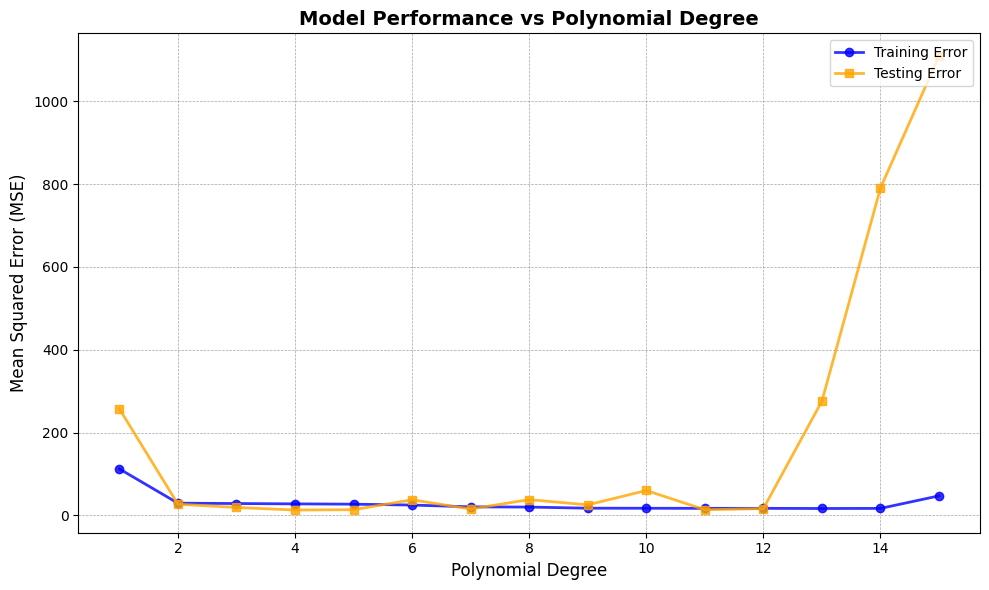

In [22]:
# Plot model performance vs polynomial degree
plt.figure(figsize=(10, 6))

# Plot training error
plt.plot(
    degrees,
    errors_poly_train,
    label="Training Error",
    color="blue",
    marker="o",
    markersize=6,
    linewidth=2,
    alpha=0.8
)

# Plot testing error
plt.plot(
    degrees,
    error_poly_test['MSE'],
    label="Testing Error",
    color="orange",
    marker="s",
    markersize=6,
    linewidth=2,
    alpha=0.8
)

# Labels and title
plt.xlabel("Polynomial Degree", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.title("Model Performance vs Polynomial Degree", fontsize=14, fontweight="bold")

# Legend
plt.legend(loc="upper right", fontsize=10)

# Grid and layout
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


In [23]:
x_train = X_train.reshape(-1,1)
x_test = X_test.reshape(-1,1)
results = {}

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(x_train)
X_poly_test = poly.transform(x_test)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)
y_pred_poly = poly_regressor.predict(X_poly_test)
results['Polynomial Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_poly),
    'R2': r2_score(y_test, y_pred_poly)
}

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=73)
rf.fit(x_train, y_train.ravel())
y_pred_rf = rf.predict(x_test)
results['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

In [26]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train.ravel())
y_pred_svr = svr.predict(X_test_scaled)
results['SVR'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'R2': r2_score(y_test, y_pred_svr)
}

In [27]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=73)
mlp.fit(X_train_scaled, y_train.ravel())
y_pred_mlp = mlp.predict(X_test_scaled)
results['Neural Network'] = {
    'MSE': mean_squared_error(y_test, y_pred_mlp),
    'R2': r2_score(y_test, y_pred_mlp)
}

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Polynomial Regression: MSE = 27.07, R² = 0.87
Random Forest: MSE = 15.96, R² = 0.93
SVR: MSE = 172.57, R² = 0.19
Neural Network: MSE = 12.10, R² = 0.94


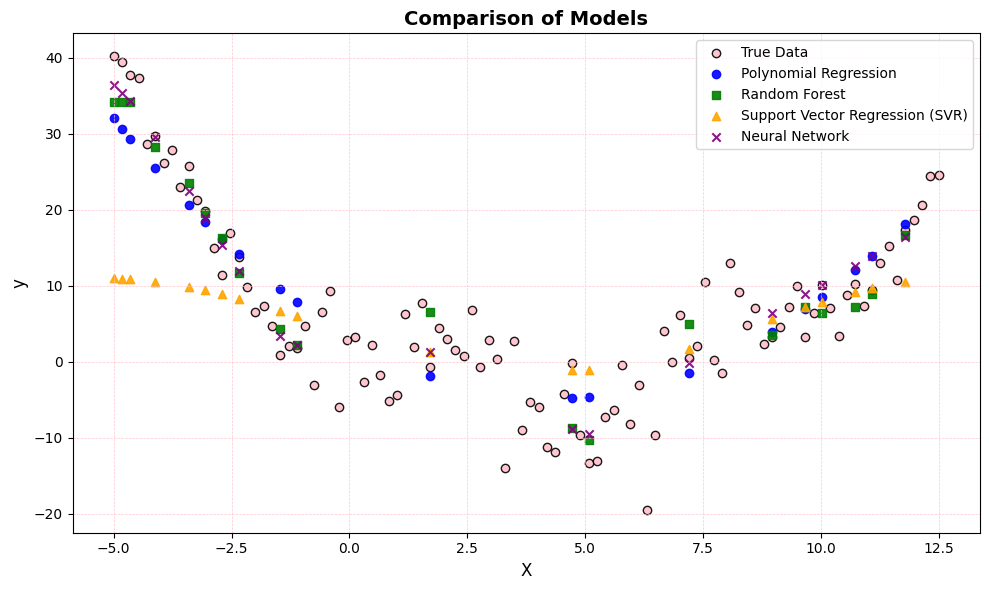

In [39]:
# Print model evaluation metrics
for model, metrics in results.items():
    print(f"{model}: MSE = {metrics['MSE']:.2f}, R² = {metrics['R2']:.2f}")

# --- Visualization ---
plt.figure(figsize=(10, 6))

# Scatter plot for true data
plt.scatter(
    x, y,
    color='pink',
    label='True Data',
    alpha=0.9,
    edgecolor='black'
)

# Scatter plots for model predictions
plt.scatter(
    X_test, y_pred_poly,
    label='Polynomial Regression',
    alpha=0.9,
    color='blue',
    marker='o'
)
plt.scatter(
    X_test, y_pred_rf,
    label='Random Forest',
    alpha=0.9,
    color='green',
    marker='s'
)
plt.scatter(
    X_test, y_pred_svr,
    label='Support Vector Regression (SVR)',
    alpha=0.9,
    color='orange',
    marker='^'
)
plt.scatter(
    X_test, y_pred_mlp,
    label='Neural Network',
    alpha=0.9,
    color='purple',
    marker='x'
)

# Add labels, title, and legend
plt.title("Comparison of Models", fontsize=14, fontweight="bold")
plt.xlabel("X", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.legend(fontsize=10, loc="best")
plt.grid(color="pink", linestyle="--", linewidth=0.5, alpha=0.9)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [31]:
def add_polynomial_terms(x, degree):
    x = x.reshape(-1, 1)
    n_samples = x.shape[0]
    poly_features = np.ones((n_samples, 1))  # Start with bias term (x^0)
    for d in range(1, degree + 1):
        poly_features = np.hstack((poly_features, x**d))  # Add x^d as a new column
    return poly_features

# Fit polynomial regression with L2 regularization
def fit_linear_regression_l2(X, y, alpha):
    """
    Fits a linear regression model with L2 regularization.
    X: Feature matrix (including bias term).
    y: Target variable.
    alpha: Regularization strength.
    Returns: Regularized coefficients.
    """
    n_features = X.shape[1]
    I = np.eye(n_features)  # Identity matrix for regularization
    I[0, 0] = 0  # Do not regularize the bias term
    return np.linalg.inv(X.T @ X + alpha * I) @ X.T @ y  # Modified normal equation

In [32]:
degrees = list(range(1, 15))
errors_poly_train = []

alpha = 0.1  # Regularization strength (adjust as needed)

for degree in degrees:
    # Add polynomial terms
    X_train_poly = add_polynomial_terms(X_train, degree)

    # Fit regularized linear regression
    coefficients = fit_linear_regression_l2(X_train_poly, y_train, alpha)

    # Predict on training set
    y_train_pred = X_train_poly @ coefficients

    # Compute training error (MSE)
    train_error = np.mean((y_train - y_train_pred) ** 2)
    errors_poly_train.append(train_error)

    print(f"Degree {degree}: Training Error with L2 = {train_error:.4f}")

X_test_poly = add_polynomial_terms(X_test, 14)
y_hat = X_test_poly @ coefficients
mae,mse,r2 = compute_metrics(y_test, y_hat)
print(mae,mse,r2)

Degree 1: Training Error with L2 = 112.2497
Degree 2: Training Error with L2 = 29.4840
Degree 3: Training Error with L2 = 28.6238
Degree 4: Training Error with L2 = 27.7955
Degree 5: Training Error with L2 = 27.0340
Degree 6: Training Error with L2 = 24.9488
Degree 7: Training Error with L2 = 20.6023
Degree 8: Training Error with L2 = 20.0565
Degree 9: Training Error with L2 = 17.3717
Degree 10: Training Error with L2 = 17.2058
Degree 11: Training Error with L2 = 16.9892
Degree 12: Training Error with L2 = 16.9874
Degree 13: Training Error with L2 = 16.6260
Degree 14: Training Error with L2 = 16.5768
11.61677435071544 817.1087196953235 -2.8184939887396876


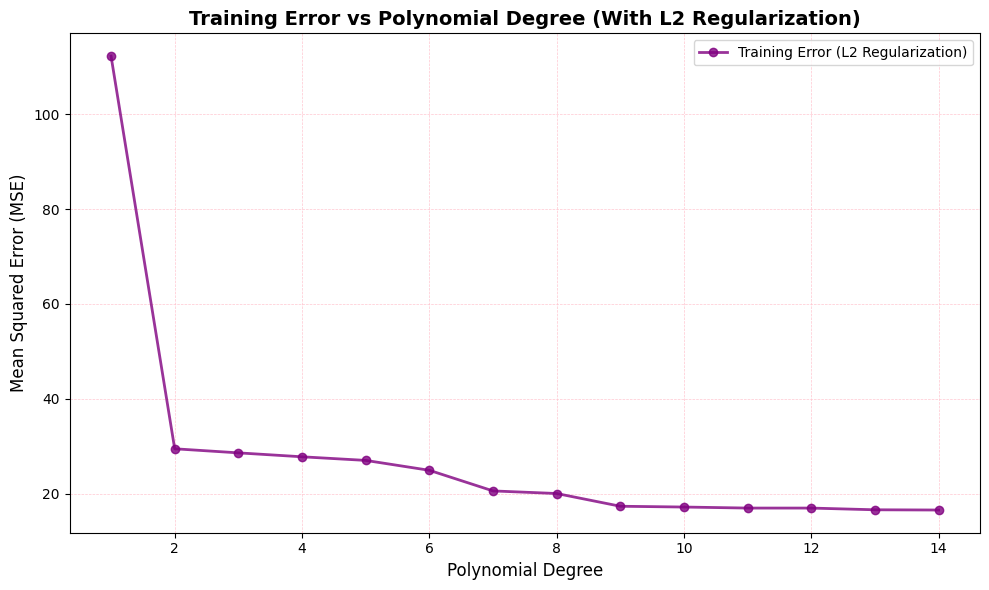

In [37]:
# Plot training error vs polynomial degree with L2 regularization
plt.figure(figsize=(10, 6))

# Plot training error
plt.plot(
    degrees,
    errors_poly_train,
    label="Training Error (L2 Regularization)",
    marker="o",
    color="purple",
    markersize=6,
    linewidth=2,
    alpha=0.8
)

# Add labels and title
plt.xlabel("Polynomial Degree", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.title("Training Error vs Polynomial Degree (With L2 Regularization)", fontsize=14, fontweight="bold")

# Add legend
plt.legend(fontsize=10, loc="upper right")

# Add grid
plt.grid(color="pink", linestyle="--", linewidth=0.5, alpha=0.9)

# Adjust layout and show plot
plt.tight_layout()
plt.show()
